In [2]:
import pandas as pd
import numpy as np
from numpy import array
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import power_transform,LabelEncoder
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
warnings.filterwarnings('ignore')


In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/training-ml/Files/main/avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [5]:
# umnamed:0 attribute is of no use in prediction .As we have year also ...so we can drop date also.....we will do ths later before scaling.

In [6]:
df.shape

(18249, 14)

In [7]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [9]:
#we can clearly see that there are no null values.so we can continue with the data

In [10]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [11]:
#data has no null values as we can see...

In [12]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [13]:
#date,type and region are of object datatype,rest are all float64 except year and unnamed:0 ,we will drop unnmaed:0 and will take care of year later

In [14]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [15]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033


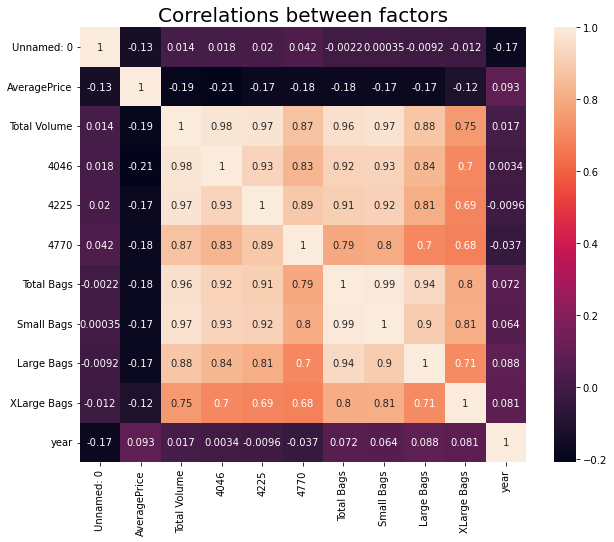

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlations between factors',fontsize=20)
plt.savefig('correlation_between _factors.jpg')
plt.show()

In [17]:
#As we can see there is a strong relation between TotalBags and TotalVolume ie, 0.96 and also Type and AveragePrice ie, 0.62.
#rest of the attributes have a weak realation with each other

<AxesSubplot:xlabel='AveragePrice', ylabel='type'>

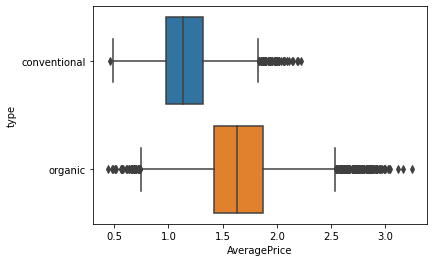

In [18]:
sns.boxplot(y="type", x="AveragePrice", data=df)

In [19]:
#From the above boxplot we can say that Organic fruit price is more as compared to conventional fruit.
#The factor which affect the average price most is the type of the avacado

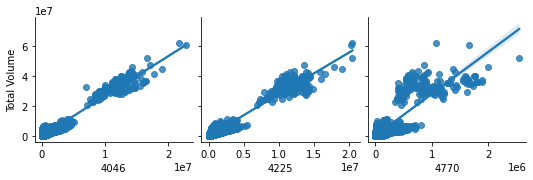

In [20]:
sns.pairplot(y_vars='Total Volume', x_vars=['4046','4225','4770'],data=df,kind='reg')

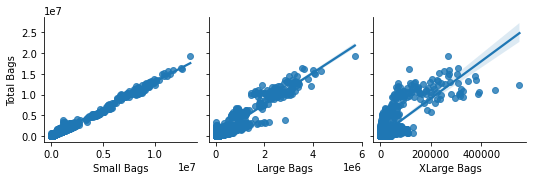

In [21]:
sns.pairplot(y_vars='Total Bags', x_vars=['Small Bags','Large Bags','XLarge Bags'],data=df,kind='reg')

In [22]:
#it is clear by these plots that their is a strong co-relation between TotalVolume Vs Small and TotalBags Vs SmallBags.
#We can say weak co-relation between totalVolume vs XLarge and totalbags Vs XLargebags.
#and a medium corelation between total volume vs Large and LargeBags 

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

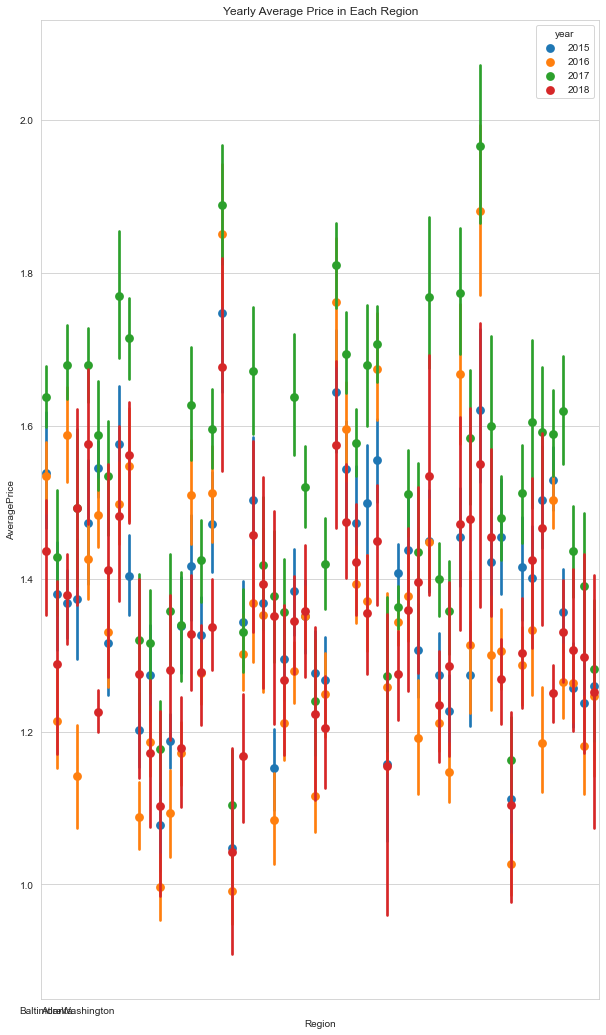

In [23]:
plt.figure(figsize=(10,18))
sns.set_style('whitegrid')
sns.pointplot(x='region',y='AveragePrice',data=df, hue='year',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region')
plt.ylabel('AveragePrice')
plt.title("Yearly Average Price in Each Region")

Text(0.5, 1.0, 'type')

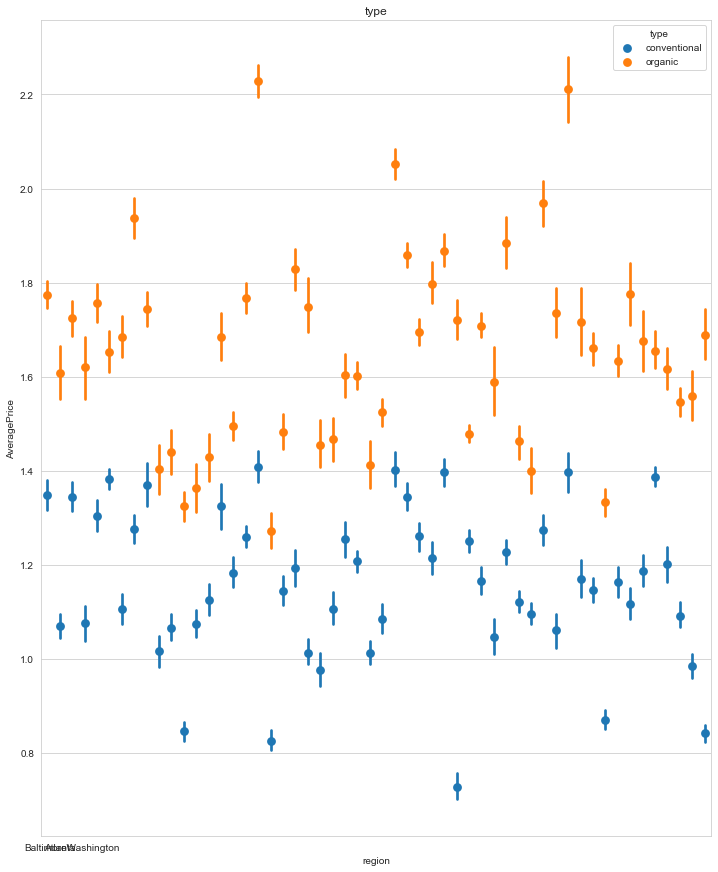

In [24]:
plt.figure(figsize=(12,15))
sns.set_style('whitegrid')
sns.pointplot(x='region', y='AveragePrice', data=df, hue='type',join=False,fontsize =20)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.title('type')

In [25]:
#NOW we check for skewness in data

In [26]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
year             0.215339
dtype: float64

In [27]:
# as we can observe there is skewness in the data .....so we tranform data into near to normally distributed data i.e. value should be near to zero.

In [28]:
#we are doing this by log1p method to make the skew value near to zero.

In [29]:
skew=('Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

In [30]:
df.skew()

Unnamed: 0      0.108334
AveragePrice    0.580303
Total Volume    0.088098
4046           -0.328195
4225           -0.486654
4770            0.099986
Total Bags     -0.218874
Small Bags     -0.622148
Large Bags     -0.547765
XLarge Bags     1.176494
year            0.215339
dtype: float64

In [31]:
#now our data is near to normally distributed...and we are good to go ahead

In [32]:
#we can see that their are three columns whose datatype is object..
#so now we perform some encoding using various encoding techniques
le=LabelEncoder()
df['type']=le.fit_transform(df['type'])

In [33]:
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [34]:
le=LabelEncoder()
df['year']=le.fit_transform(df['year'])

In [35]:
################### PREDICTION FOR AVERAGE PRICE   ########################################################################

In [36]:
y = df['AveragePrice']
X = df.drop(columns=['AveragePrice','Unnamed: 0','Date'])

In [37]:
#Data scaling Z=(X-mean)/std

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [38]:
X_scaled.shape[1]

11

In [39]:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    rf=RandomForestRegressor()
    rf.fit(X_train,y_train)
    pred_train = rf.predict(X_train)
    pred_test= rf.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:-0.9783613736921989
At random state0,the testing accuracy is:-0.8481474113540758


At random state1,the training accuracy is:-0.9783113709823075
At random state1,the testing accuracy is:-0.8587061514552525




ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "E:\ANACONDA\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\DEEPAK~1.MUK\AppData\Local\Temp/ipykernel_7660/4154854750.py", line 4, in <module>
    rf.fit(X_train,y_train)
  File "E:\ANACONDA\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 1046, in __call__
    while self.dispatch_one_batch(iterator):
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "E:\ANACONDA\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_backends.py", line 208, in apply_async
    result = ImmediateResult(func)
  File "E:\ANACONDA\lib\site-packages\joblib\_parallel_backends.py", 

TypeError: object of type 'NoneType' has no len()

In [40]:
X_train.shape

(14599, 11)

In [41]:
y_train.shape

(14599,)

In [42]:
X_test.shape

(3650, 11)

In [43]:
y_test.shape

(3650,)

In [97]:
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

R2 score: 78.67796273310191
cross val score: -77.98133030794263


In [ ]:
#lets plot and visualize
y_pred=rf.predict(X_test)
y_pred

In [ ]:
plt.scatter(y_test,y_pred,color='r')
plt.xlabel='actual average price'
plt.ylabel='Predicted average price'
plt.title='Actual vs model predicted '
plt.show()

In [ ]:
 mean_squared_error(y_test,y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dtr=r2_score(y_test,y_pred)
print('R2 score:',dtr*100)
dtscore=cross_val_score(dt,X,y,cv=5)
dtr=dtscore.mean()
print('cross val score:',dtr*100)


In [ ]:
mean_squared_error(y_test,y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
import xgboost as xgb
from xgboost import XGBRegressor
xg=XGBRegressor()

In [ ]:
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=r2_score(y_test,y_pred)
print('R2 score:',xg_score*100)
xgscore=cross_val_score(xg,X,y,cv=5)
xgr=dtscore.mean()
print('cross val score:',*100)


In [ ]:
 mean_squared_error(y_test,y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada=AdaBoostRegressor()
ada.fit(X_train,y_train)
ada.score(X_train,y_train)
y_pred=ada.predict(X_test)
ada_score=r2_score(y_test,y_pred)
print('R2 score:',ada_score*100)

adascore=cross_val_score(ada,X,y,cv=5)
adab=adascore.mean()
print('cross val score:',adab*100)


In [ ]:
 mean_squared_error(y_test,y_pred)

In [ ]:
mean_absolute_error(y_test,y_pred)

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

In [ ]:
#as observed the random forest regressor works well with this dataset...so we hypertune parameters of final model RandomForestRegressor using gridsearchCV

In [ ]:
parameters ={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"],'min_samples_split':[2], 
             'min_samples_leaf':[1], 'bootstrap':[True]}} 
rf=RandomForestRegressor()

In [ ]:
gcv=GridSearchCV(rf,parameters)
gcv.fit(X_train,y_train)
print(gcv.best_params_)

In [ ]:
rf=RandomForestRegressor(')
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=r2_score(y_test,y_pred)
print('R2 score:',rfs*100)
rfscore=cross_val_score(rf,X,y,cv=5)
rfr=rfscore.mean()
print('cross val score:',rfr*100)

In [ ]:
 mean_squared_error(y_test,y_pred)
print('mse:')

In [ ]:
mean_absolute_error(y_test,y_pred)
print('mae:')

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))
print('rmse:')

In [ ]:
#the best model is RandomForestRegressor with 84% accuracy and 35% cross validation score and ROC-AUC-SCORE=1.00

#saving the model to local file system
filename='avacado analysis_model.pickle'
pickle.dump(xg,open(filename,'wb'))

In [ ]:
############## PREDICTION FOR REGION #########################################################################################

In [49]:
y = df['region']
 
X = df.drop(columns=['region','Unnamed: 0','Date'])

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [51]:
X_scaled.shape[1]

11

In [52]:
X_scaled.shape

(18249, 11)

In [69]:
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder,power_transform
from sklearn.model_selection import  train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,classification_report
from sklearn.metrics import plot_roc_curve

In [58]:
for i in range(0,100):
    X_train,X_test,y_train,y_test =train_test_split(X_scaled,y,test_size=0.2,random_state=i)
    reg=LogisticRegression()
    reg.fit(X_train,y_train)
    pred_train = reg.predict(X_train)
    y_pred= reg.predict(X_test)
    print(f"At random state{i},the training accuracy is:-{accuracy_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:-{accuracy_score(y_test,y_pred)}")
    print("\n")

At random state0,the training accuracy is:-0.5609288307418316
At random state0,the testing accuracy is:-0.5394520547945205


At random state1,the training accuracy is:-0.5627097746420988
At random state1,the testing accuracy is:-0.5498630136986301


At random state2,the training accuracy is:-0.5544900335639428
At random state2,the testing accuracy is:-0.5564383561643835


At random state3,the training accuracy is:-0.557983423522159
At random state3,the testing accuracy is:-0.541095890410959


At random state4,the training accuracy is:-0.5594218782108363
At random state4,the testing accuracy is:-0.54


At random state5,the training accuracy is:-0.5589423933146106
At random state5,the testing accuracy is:-0.5506849315068493


At random state6,the training accuracy is:-0.557983423522159
At random state6,the testing accuracy is:-0.5413698630136986


At random state7,the training accuracy is:-0.5590108911569286
At random state7,the testing accuracy is:-0.54


At random state8,the training a

KeyboardInterrupt: 

In [70]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [71]:
X_train.shape

(14599, 11)

In [72]:
y_train.shape

(14599,)

In [73]:
X_test.shape

(3650, 11)

In [74]:
y_test.shape

(3650,)

In [79]:
knc= KNeighborsClassifier()  
knc.fit(X_train, y_train)  
knc.score(X_train,y_train)
y_pred=knc.predict(X_test)
knc_score=accuracy_score(y_test,y_pred)
print('accuracy score:',knc_score*100)

kncscore=cross_val_score(knc,X,y,cv=5)
kn=kncscore.mean()
print('cross val score:',kn*100)

accuracy score: 85.67123287671234
cross val score: 61.01084402932686


In [80]:
dt= DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_train,y_train)
y_pred=dt.predict(X_test)
dts=accuracy_score(y_test,y_pred)
print('accuracy score:',dts*100)

dtscore=cross_val_score(dt,X,y,cv=5)
dtc=dtscore.mean()
print('cross val score:',dtc*100)

accuracy score: 79.75342465753424
cross val score: 55.67349283158831


In [84]:
import xgboost as xgb
from xgboost import XGBClassifier

xg=XGBClassifier()
xg.fit(X_train,y_train)
xg.score(X_train,y_train)
y_pred=xg.predict(X_test)
xg_score=accuracy_score(y_test,y_pred)
print('accuracy score:',xg_score*100)

xgscore=cross_val_score(xg,X,y,cv=5)
xgr=xgscore.mean()
print('cross val score:',xgr*100)

accuracy score: 88.05479452054794
cross val score: 64.47910893207747


In [85]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 90.38356164383562
cross val score: 68.05748694519421


In [ ]:
#so according to dataset  Randomforestclassifier is getting best accuracy of 90%,which is best among all and 
#the AUC value according to this is 1.now we do gridsearcv hyperparametertuning on this algorithm

In [94]:
grid_parameters ={'criterion':['gini','entropy'],'max_features':["auto","sqrt","log2"],'max_depth':[4,5,6,7,8],'bootstrap': [True],
 'min_samples_leaf':[1]}
clf=GridSearchCV(rf,grid_parameters)
clf.fit(X_train,y_train)
print(clf.best_params_)

KeyboardInterrupt: 

In [89]:
rf=RandomForestClassifier(bootstrap='True',criterion= 'entropy',max_features='auto',max_depth=7, max_leaf_nodes=None, min_samples_leaf= 1)
rf.fit(X_train,y_train)
rf.score(X_train,y_train)
y_pred=rf.predict(X_test)
rfs=accuracy_score(y_test,y_pred)
print('accuracy score:',rfs*100)

rfscore=cross_val_score(rf,X,y,cv=5)
rfc=rfscore.mean()
print('cross val score:',rfc*100)

accuracy score: 74.6027397260274



KeyboardInterrupt



In [90]:
type(clf)

sklearn.model_selection._search.GridSearchCV

In [91]:
clf.best_estimator_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [93]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(clf.best_estimator_,X_test,y_test)
plt.title("ROC_AUC PLOT")
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [ ]:
#the best model is RandomForestclassifier with 90% accuracy and 68% cross validation score and ROC-AUC-SCORE=1.00

#saving the model to local file system
filename='avacado analysis_model.pickle'
pickle.dump(rf,open(filename,'wb'))